In [2]:
import numpy as np
import pyttsx3
import re 
import matplotlib.pyplot as plt 
from tensorflow.keras.preprocessing import image 
from tensorflow.keras.models import load_model 
from PIL import Image, ImageStat  

In [3]:
# Initialize the text-to-speech engine
engine = pyttsx3.init()

def speak(text):
    engine.say(text) 
    engine.runAndWait()

In [4]:
def classify_image(image_path):
    # Normalize the image path by replacing single backslashes with double backslashes
    image_path = image_path.replace("\\", "\\\\")
    
    # Load the image
    img = image.load_img(image_path, target_size=(128, 128))  # Resize to match model input size
    img_array = image.img_to_array(img)  # Convert image to array
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    img_array /= 255.0  # Normalize the image

    # Load the model (assuming the model is already trained and saved)
    model_path = "D:\\Revature\\P1\\models\\my_vgg16_model.h5"
    model = load_model(model_path)

    # Make predictions
    prediction = model.predict(img_array)

    # Convert prediction to class label
    class_label = 1 if prediction[0] > 0.5 else 0
    class_name = 'Real' if class_label == 1 else 'Fake'
    
    # Generate the explanation
    explanation = generate_explanation(class_name, image_path)
    
    # Speak the results
    speak(f"The image was classified as {class_name}.")
    speak(explanation)
    
    # Plot the image
    plot_image(image_path)
    
    return class_name, explanation

In [5]:
def generate_explanation(class_name, image_path):
    # Load the image using PIL for analysis
    img = Image.open(image_path)

    # Check the number of color channels
    if img.mode == 'L':  # 'L' mode means grayscale
        image_type = "black and white"
    else:
        # Convert image to RGB to ensure we analyze color data properly
        img_rgb = img.convert('RGB')
        # Get pixel data
        pixels = np.array(img_rgb)
        # Check if all three channels are the same for each pixel
        if np.all(pixels[..., 0] == pixels[..., 1]) and np.all(pixels[..., 1] == pixels[..., 2]):
            image_type = "black and white"
        else:
            image_type = "color"

    # Calculate the average brightness to infer fairness
    stat = ImageStat.Stat(img)
    brightness = stat.mean[0]

    # Set thresholds for determining fairness
    if brightness > 150:
        fairness = "fair"
    elif brightness > 100:
        fairness = "medium"
    else:
        fairness = "dark"

    # Combine all information into an explanation
    explanation = (
        f"The image was classified as {class_name}. "
        f"It appears to be a {image_type} image. "
        f"The detected face has a {fairness} complexion."
    )

    # Additional explanation based on classification
    if class_name == "Real":
        explanation += " The image contains natural textures and lighting patterns."
    else:
        explanation += " The image shows signs of being artificially generated, with unusual pixel patterns and lighting."

    return explanation

In [6]:
def plot_image(image_path):
    # Load and plot the image
    img = Image.open(image_path)
    plt.imshow(img)
    plt.axis('off')  # Hide axes
    plt.title('Classified Image')
    plt.show()

In [7]:
def get_image_path_from_user():
    # Ask the user for input
    user_input = input("Please enter the sentence containing the image path: ")
    
    # Use regex to find the path in the input sentence
    match = re.search(r'(?:[a-zA-Z]:\\(?:[^\\\n]+\\)*[^\\\n]*\.(?:jpg|jpeg|png|bmp))', user_input)
    if match:
        image_path = match.group(0)
        # Replace single backslashes with double backslashes
        image_path = image_path.replace("\\", "\\\\")
        return image_path
    else:
        print("No valid image path found in the input.")
        return None


Please enter the sentence containing the image path:  "C:\Users\Bharath Reddy\Downloads\download (1).jpeg"


1/1 [==============================] - 0s 426ms/step


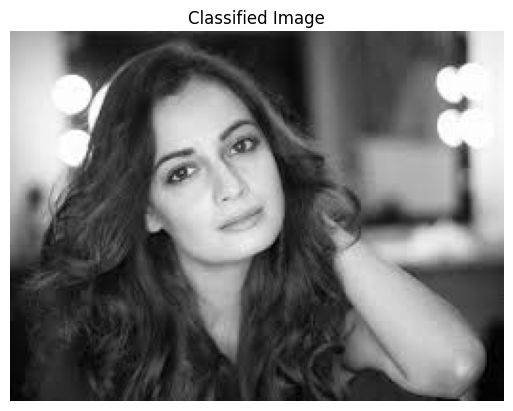

Predicted class: Real
Explanation: The image was classified as Real. It appears to be a black and white image. The detected face has a medium complexion. The image contains natural textures and lighting patterns.


In [9]:
# Main execution
image_path = get_image_path_from_user()
if image_path:
    class_name, explanation = classify_image(image_path)
    print(f"Predicted class: {class_name}")
    print(f"Explanation: {explanation}")